In [6]:
# Import packages


# !pip install voxelmorph



Found existing installation: voxelmorph 0.2
Uninstalling voxelmorph-0.2:
  Would remove:
    /home/guzikjar/.local/lib/python3.10/site-packages/voxelmorph-0.2.dist-info/*
    /home/guzikjar/.local/lib/python3.10/site-packages/voxelmorph/*
Proceed (Y/n)? ^C
ERROR: Operation cancelled by user


In [4]:
# imports
%matplotlib inline
import os, sys
import glob

# third party imports
import numpy as np
import tensorflow as tf
# assert tf.__version__.startswith('2.')

import scipy.io as sio
# import tensorflow.keras.backend as K
from scipy.interpolate import interpn
import matplotlib.pyplot as plt

import SimpleITK as sitk

In [20]:
# vm_dir = '../input/voxelmorph-master/voxelmorph-master'
# sys.path.append(os.path.join(vm_dir, 'src')) # add source
# sys.path.append(os.path.join(vm_dir, 'ext', 'medipy-lib'))
import medpy
# import networks
# from medpy.metric import dice
# import datagenerators

import voxelmorph.voxelmorph as vxm
import neurite as ne
from voxelmorph.voxelmorph.tf import networks

In [3]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense

In [15]:
# Load data
trainFolder = 'Dataset_HW4/train/'
testFolder = 'Dataset_HW4/test/'

# List all .nii.gz files in the directory
train_files = [f for f in os.listdir(trainFolder) if f.endswith('.nii.gz')]
test_files = [f for f in os.listdir(testFolder) if f.endswith('.nii.gz')]

# Sort the files if necessary (you may want them in a particular order)
train_files.sort()
test_files.sort()

# Initialize an empty list to store the numpy arrays
train_data_list = []
test_data_list = []

# Load in train data
for train_file in train_files:
    # Full file path
    file_path = os.path.join(trainFolder, train_file)
    
    # Load the NIfTI file using SimpleITK
    trn = sitk.ReadImage(file_path)
       
    # Convert the SimpleITK image to a numpy array
    trn_data = sitk.GetArrayFromImage(trn)
    
    # Append the numpy array to the list
    train_data_list.append(trn_data)
    
    
# Load in test data
for test_file in test_files:
    # Full file path
    file_path = os.path.join(testFolder, test_file)
    
    # Load the NIfTI file using SimpleITK
    tst = sitk.ReadImage(file_path)
       
    # Convert the SimpleITK image to a numpy array
    tst_data = sitk.GetArrayFromImage(tst)
    
    # Append the numpy array to the list
    test_data_list.append(tst_data)
    
npTrain = np.stack(train_data_list, axis=0)
npTest = np.stack(test_data_list, axis=0)

# Check the shape of the resulting higher-dimensional array
print(npTrain.shape)
print(npTest.shape)


(48, 224, 192, 160)
(22, 224, 192, 160)


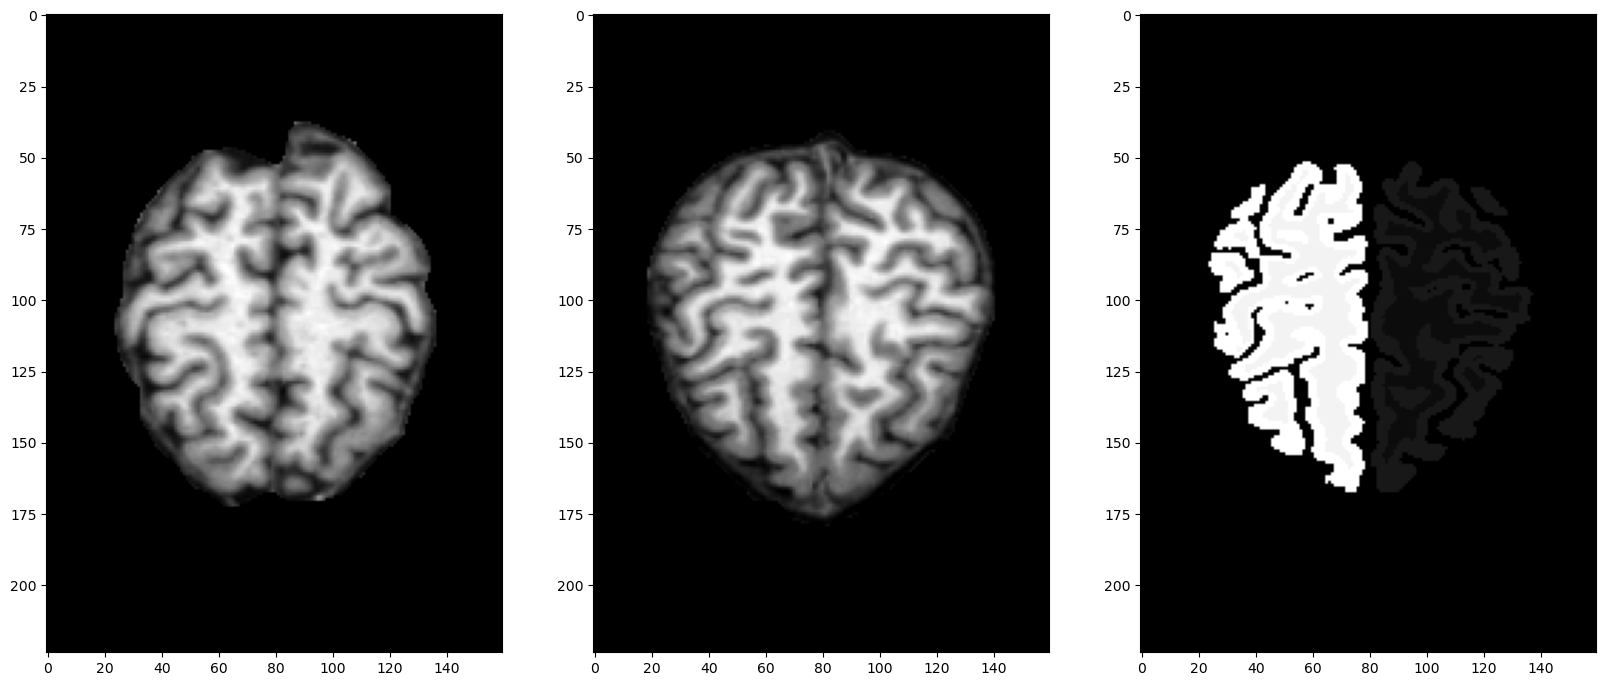

In [19]:
# Look at some images
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (20, 10))
ax1.imshow(npTest[0, :, 40, :], cmap='gray')
ax2.imshow(npTest[10, :, 40, :], cmap='gray')
ax3.imshow(npTest[21, :, 40, :], cmap='gray')

In [25]:


vol_size=(224,192,160)
nf_enc=[16,32,32,32]
nf_dec=[32,32,32,32,32,16,16,3]


net = networks.Unet(vol_size)
# net.load_weights(os.path.join(vm_dir, 'models',  'vm2_cc.h5'))
net.summary()

2024-11-14 19:38:29.143687: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1886] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 79078 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-80GB, pci bus id: 0000:b7:00.0, compute capability: 8.0


Model: "unet"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 unet_input (InputLayer)     [(None, 224, 192, 160)]      0         []                            
                                                                                                  
 unet_enc_conv_0_0 (Conv2D)  (None, 224, 192, 16)         23056     ['unet_input[0][0]']          
                                                                                                  
 unet_enc_conv_0_0_activati  (None, 224, 192, 16)         0         ['unet_enc_conv_0_0[0][0]']   
 on (LeakyReLU)                                                                                   
                                                                                                  
 unet_enc_pooling_0 (MaxPoo  (None, 112, 96, 16)          0         ['unet_enc_conv_0_0_activat